In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
add_df = pd.read_csv('./data/advertising.csv',index_col=0)
add_df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
add_df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [15]:
add_df.shape

(200, 4)

In [16]:
add_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# features
* **TV :** advertisng dollars spent on TV for a single product in a given market in (THOUSAND Of dollars)
* **Radio :** advertising dollars spent on **RADIO**
* **Newspaper :** advertising dollars spent on **NEWSPAPER**
* **index** is the market each market of a given product is identified by **index** or **id**

# Response
### Sales
* **Sales** of a single product in a given  market in (thousands of items)/ sales of product being advertised
* how many of that item/Product was sold  given that it was advertised on TV RADIO AND NEWSPAPER

# EDA(Exploratory Data Analysis)

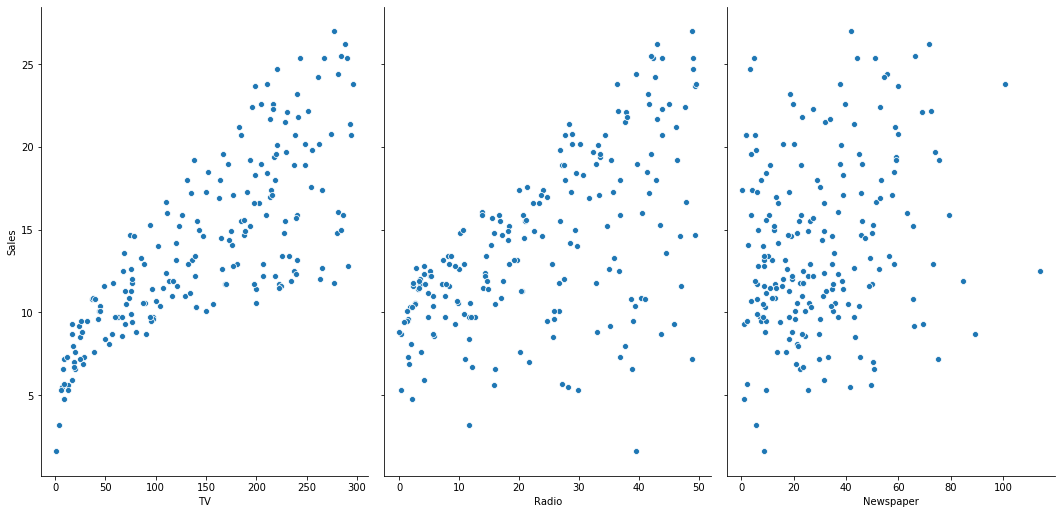

In [20]:
sns.pairplot(add_df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7)

## Check the correlations between the each feature and Response
* **Strong Linear Relationship** between**TV** and **Sales** => as TV **increases** so does**Sales**
* **Less strong Relationship** between **Radio** and **Sales**
* **Weak Relationship** between **Newspaper** and **Sales**


## CONFIRM LINEAR RELATIONSHIP
### Draw a (Line of best fit) and 95% confidence band

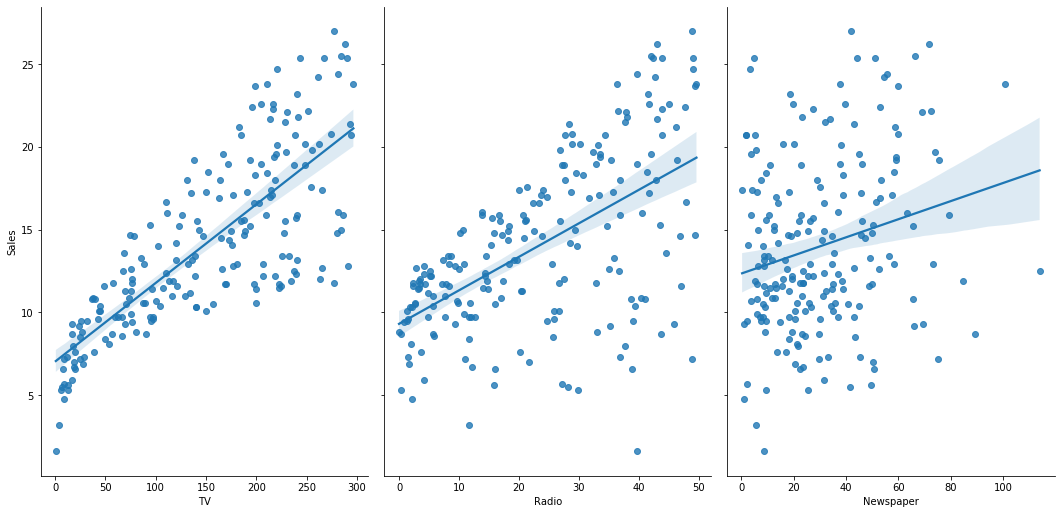

In [21]:
sns.pairplot(add_df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='reg')

### Define Features and Response

In [44]:
feature_cols=[['TV','Radio','Newspaper']]
X = add_df[['TV','Radio','Newspaper']]
X.shape

(200, 3)

In [46]:
feature_cols

[['TV', 'Radio', 'Newspaper']]

In [26]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [29]:
y = add_df['Sales']
y.shape

(200,)

In [30]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [32]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


## Train-Test Splitting
### 40% (0.4) for test

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [36]:
print(X_train.shape)
print(X_test.shape)

(120, 3)
(80, 3)


In [37]:
print(y_train.shape)
print(y_test.shape)

(120,)
(80,)


## Training/fitting Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linreg =LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Interprating Models Coefficients and Intercepts

In [41]:
print(linreg.intercept_)
print(linreg.coef_)

2.627338769166439
[0.04634218 0.19434189 0.00189508]


In [52]:
features=['TV','Radio','Newspaper']
for feature,coef in zip(features,linreg.coef_):
    print(f"{feature} has  a coefficient of {coef}")


TV has  a coefficient of 0.046342183688434666
Radio has  a coefficient of 0.19434188651589196
Newspaper has  a coefficient of 0.001895082077527646


## y=2.67+0.046xTV+0.194xRadio+0.001xNewspaper

# interprating Linear Model

 * A "Unit" **increase** in **TV** add spending is **ASSOCIATED** with a 0.046"Unit" **increase in Sales**
 * but the units were in thousands implyin that **1 "UNIT" = 1000**
 * THUS 1000 increase in TV add spending is **ASSOCIATED** with the Sale of 46 items 
 * the coefficient is **POSITIVE**
 * **NEGATIVE COEFFICIENT** would imply a "UNIT" increase in TV adds is **ASSOCIATED** with a **"UNIT DECREASE IN SALES"**

# prediction on Test set

In [54]:
y_pred=linreg.predict(X_test)

In [55]:
y_pred

array([11.81417072, 13.89803859, 12.45629804, 11.41065651, 10.67656887,
        9.79108216, 16.33963039,  9.55060054, 10.64459834, 14.01584311,
       19.46733658, 12.47593185, 10.12363566, 21.78270731, 21.25747924,
       11.71096264, 18.14719928, 17.08384294, 17.32239675, 13.85447734,
        6.36141666, 23.51771764,  7.23368335,  7.63403456,  6.67810765,
       14.79207945, 11.92009215, 18.14234679, 18.82322901,  3.36067223,
       15.41187815, 15.94212078,  7.80311359,  9.51545246, 23.13861091,
       15.76746828,  9.95950534, 14.96773213, 15.18928006,  9.88013264,
        3.43589459, 20.5806884 , 12.41267029,  9.01069407, 15.31887996,
        9.82099355, 13.64973099, 16.49470532,  6.42308766, 18.23293933,
        6.39580218, 12.67596517, 11.3990703 , 13.09829123, 20.34201757,
       18.99422096,  4.25192404, 10.03543545, 17.24879121,  9.15259842,
       19.68072795,  9.85290656, 13.77722583, 13.25824476, 17.07539967,
       19.40927214, 20.76793823, 10.92570187, 21.05295929, 13.00

In [56]:
len(y_pred)

80

## Model Evaluation
### Using RMSE
#### Other options
* **MSE**
* **MAE**

# RMSE easy to interprate and in y-units

In [60]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.6139869705384644


# MSE

In [61]:
print(metrics.mean_squared_error(y_test,y_pred))

2.60495394106793


# MAE

In [59]:
print(metrics.mean_absolute_error(y_test,y_pred))

1.2261051140985024


# Feature Selection
## Newspaper feature had  a (Lower coefficient) and showed weak relationship with Sales(Response)
### Remove Newspaper and see what happens to RMSE

In [118]:
X = add_df[['TV','Radio']]
X.shape

(200, 2)

In [119]:
y=add_df['Sales']

In [120]:
y.shape

(200,)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [122]:
print(X_train.shape)
print(y_train.shape)

(120, 2)
(120,)


In [123]:
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80,)


In [124]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_pred = linreg.predict(X_test)
y_pred

array([21.77515707, 16.33324701,  7.66838261, 17.54744198, 18.44512395,
       23.62420843, 16.30478001, 13.22557116,  9.25573855, 17.15244233,
       14.37131393, 10.02877905, 17.19537935, 16.91732464, 14.75813394,
       15.60509035, 12.43798302, 16.90338654, 11.51187722, 18.03769307,
        9.40179317, 12.95617919,  9.01939871, 10.53247641, 11.41025778,
       14.9217168 , 10.01129397, 19.29836639, 18.39303104, 16.97722048,
       21.57413533, 14.25632583, 16.43855295, 12.19366192, 19.85618544,
       15.30355054, 13.71439735,  9.97631945, 20.98527418,  7.73303189,
        3.7832163 ,  7.22671626,  6.20695789, 18.37354596,  8.66791119,
       14.15813129, 15.31631968, 20.33542584, 20.67964673, 19.3997155 ,
       23.95312824, 15.06148539,  6.96261969, 19.88069996, 18.73217933,
       12.39622497, 13.91116751,  6.28482627, 15.11458331,  9.85823869,
       12.0124344 , 12.05405728,  8.91711217, 21.41627778, 23.0799464 ,
       12.59360337,  6.71416779, 17.91584384, 16.23231342,  9.10

In [126]:
len(y_pred)

80

In [127]:
from sklearn import metrics

In [128]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.5576796054790365


# Rmse is LOWER THAN WHEN WE HAD (newspaper) feature